<a href="https://colab.research.google.com/github/akm2208/Aayushi-First-Files/blob/main/Question2bii_This_code_works.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Cloning https://github.com/OpenHydrology/lmoments3.git to /tmp/pip-req-build-5rkz6hfz
  Running command git clone --filter=blob:none --quiet https://github.com/OpenHydrology/lmoments3.git /tmp/pip-req-build-5rkz6hfz
  Resolved https://github.com/OpenHydrology/lmoments3.git to commit 7e19f97c23019ca68cbd526b8bd417c412438f1c
  Preparing metadata (setup.py) ... done
<xarray.Dataset>
Dimensions:    (time: 60225, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) fl

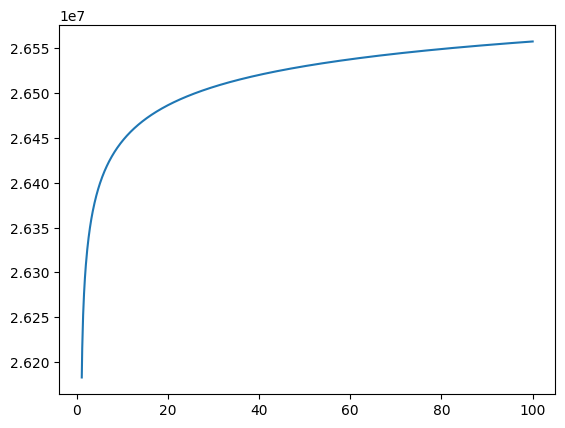

In [9]:
from google.colab import drive
drive.mount("/content/drive")

!pip install git+https://github.com/OpenHydrology/lmoments3.git
!pip install cftime
!pip install netCDF4

import lmoments3 as lm
from lmoments3 import distr
import xarray as xr
import numpy as np
import pandas as pd
import netCDF4 as nc
import glob
import os
import cftime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

fn = "/content/drive/My Drive/CIVE5363_Midterm_Q2bii/tas_day_CanESM5_historical_r1i1p1f1_gn_18500101-20141231.nc"

ds =xr.open_dataset(fn, engine="netcdf4")
print(ds)

# Load the dataset
ds = xr.open_dataset(fn, engine="netcdf4")
print(ds)

lat = ds.lat.values
lon = ds.lon.values



# Urban area coordinates
latitude = 35.8
longitude = -91

# Calculate the index for the nearest grid point
sq_diff_lat = (lat - latitude) ** 2
sq_diff_lon = (lon - longitude) ** 2
min_index_lat = sq_diff_lat.argmin()
min_index_lon = sq_diff_lon.argmin()
latitude_grid = lat[min_index_lat]
longitude_grid = lon[min_index_lon]

# Select data for the specified location (Urban Area)
dsloc = ds.sel(lat=latitude_grid, lon=longitude_grid, method='nearest')
annual_max_urban = dsloc.groupby('time.year').max('time')

# Convert to arrays
if not np.isnan(np.min(annual_max_urban.tas)):
    annual_max_urban = np.array(annual_max_urban.tas)

def gev_wrapper(data, T):
    gevfit = gev_fit(data)
    RL = return_levels(gevfit, T)
    return RL

def gev_fit(data):
    gevfit = distr.gev.lmom_fit(data)
    return gevfit

def return_levels(gevfit, T):
    RL = distr.gev.ppf(1.0 - 1.0 / T, **gevfit)
    return RL

# Calculate GEV return levels for the urban area
T_100 = np.arange(0.1, 99.1, 0.1) + 1
Urban_RL = gev_wrapper(annual_max_urban, T_100) * 86400

# Plot the return levels for the urban area
plt.plot(T_100, Urban_RL, label='Urban')
